In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from matplotlib import dates
from datetime import datetime

In [2]:
data= pd.read_csv('Walmart.csv')

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# Splitting Date and create new columns (Day, Month, and Year)
data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [9]:
total =   df.groupby('Store')['Weekly_Sales'].sum().sort_values()
total1= np.array(total)

NameError: name 'df' is not defined

In [ ]:
total1



In [10]:
total1.plot(kind='bar')

NameError: name 'total1' is not defined

In [11]:
clrs = ['lightsteelblue' if ((x < max(total1)) and (x > min(total1))) else 'midnightblue' for x in total1]


ax = total1.plot(kind='bar',color=clrs);

NameError: name 'total1' is not defined

<class 'numpy.float64'>


Text(0, 0.5, 'Total Sales')

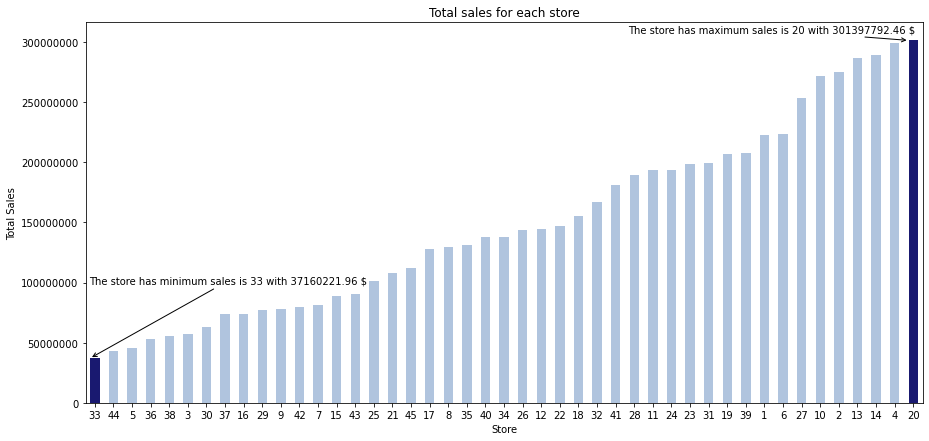

In [12]:
plt.figure(figsize=(15,7))

# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

In [13]:
max(
    total_sales_for_each_store_array
    )

301397792.46000004

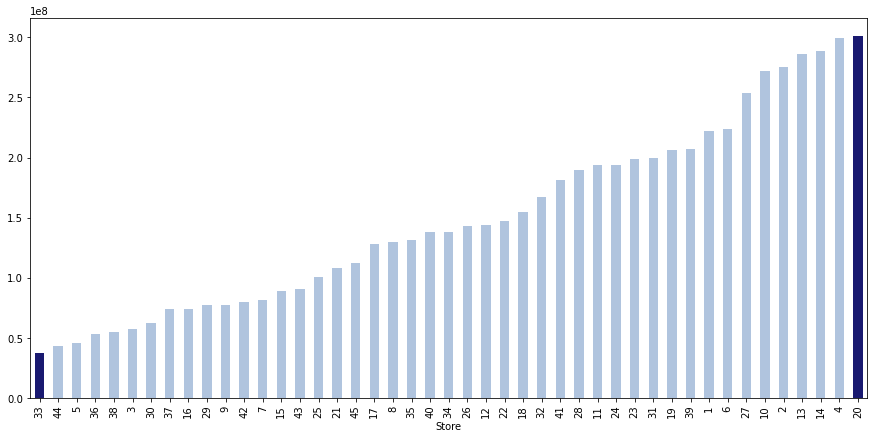

In [14]:
plt.figure(figsize=(15,7))

# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs)

<AxesSubplot:>

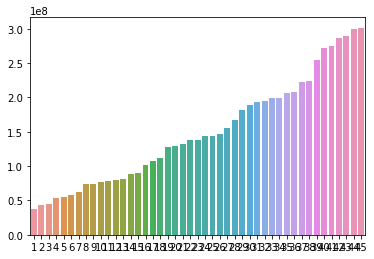

In [15]:
sns.barplot(y= total_sales_for_each_store_array,x=data['Store'].unique())

In [16]:
data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [17]:
total_sales_for_each_store_array.plot(kind='bar')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
x= pd.DataFrame(data.groupby('Store'))

In [ ]:
x



In [18]:
 y = total_sales_for_each_store_array.mean()

In [19]:
total_sales_for_each_store_array.std()

77294148.55994278

In [20]:
std = []
for i in range(total_sales_for_each_store):
    std= abs(x-i)

TypeError: 'Series' object cannot be interpreted as an integer

In [21]:
# Which store has maximum standard deviation
data_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))                                                                                                                                          

In [22]:
data_std.head()

                      

,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742
4,266201.442297
13,265506.995776


In [23]:
o=data_std['Store']==14

KeyError: 'Store'

In [24]:
data_std.drop(columns=["Store"],inplace=True)

KeyError: "['Store'] not found in axis"

C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Sales Distribution of Store #14')

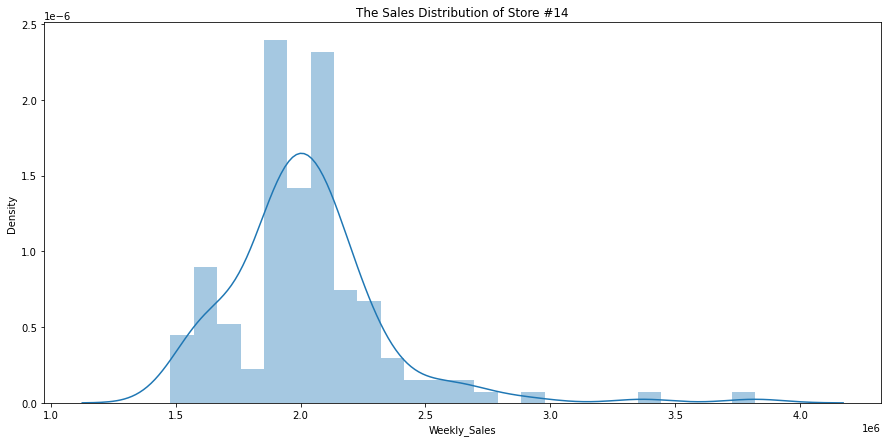

In [25]:
# Distribution of store has maximum standard deviation
plt.figure(figsize=(15,7))
sns.distplot(data[data['Store'] == data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(data_std.head(1).index[0]))

In [26]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std() / data.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


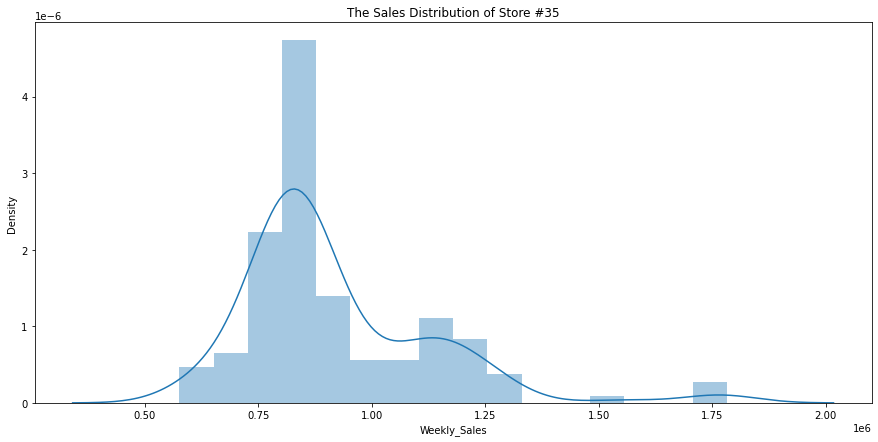

In [27]:
# Distribution of store has maximum coefficient of mean to standard deviation
coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(15,7))
sns.distplot(data[data['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]));


In [28]:
plt.figure(figsize=(15,7))

# Sales for third quarterly in 2012
Q3 = data[(data['Date'] > '2012-07-01') & (data['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = data[(data['Date'] > '2012-04-01') & (data['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
Q2.plot(ax=Q3.plot('bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

<Figure size 1080x504 with 0 Axes>

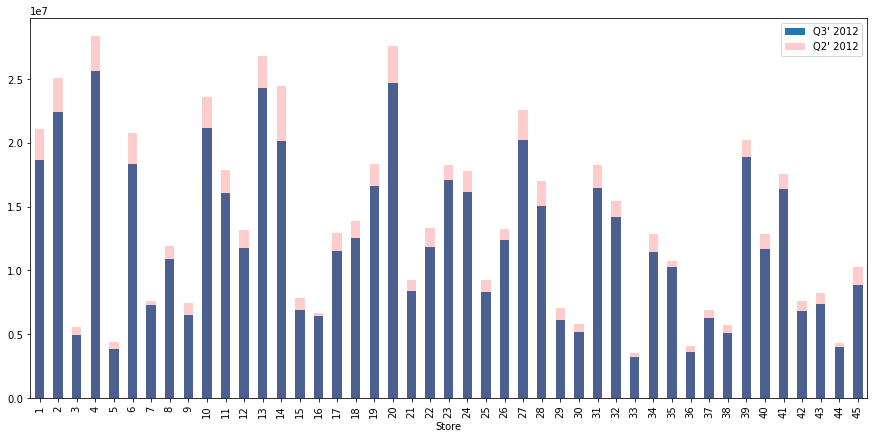

In [29]:
plt.figure(figsize=(15,7))

# Sales for third quarterly in 2012
Q3 = data[(data['Date'] > '2012-07-01') & (data['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = data[(data['Date'] > '2012-04-01') & (data['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
Q2.plot(ax=Q3.plot(kind='bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["Q3' 2012", "Q2' 2012"]);

In [30]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [31]:
y =data[data['Holiday_Flag']==0].groupby('Date')['Weekly_Sales'].mean()

In [32]:
df_y =pd.DataFrame(y)
df_y.shape

(133, 1)

df_y

In [33]:
n = df_y["Weekly_Sales"]
n = np.array(n)
n

array([ 938663.90822222, 1120529.58355556, 1087055.21111111,
       1072822.084     ,  977079.35844444, 1048761.28022222,
       1109089.50844444,  999754.992     ,  980754.69      ,
       1115300.95822222, 1004081.49066667,  994098.94577778,
        971225.038     , 1105572.01111111, 1041588.22888889,
       1017377.37533333, 1007335.11555556, 1002669.068     ,
       1061277.83466667, 1071222.20266667, 1058267.694     ,
       1035756.362     , 1077849.856     , 1027642.21288889,
        997529.98022222,  991785.85377778, 1002288.31622222,
       1032542.63133333, 1045798.95377778, 1020216.45422222,
       1052562.00977778, 1064433.986     ,  957349.478     ,
        919078.098     , 1237039.342     ,  958877.18777778,
        957037.10044444,  968951.79888889, 1062812.14933333,
       1002790.75955556, 1020564.36688889, 1024995.574     ,
       1373795.55222222, 1798475.90222222,  965755.35977778,
       1057300.43333333,  903859.512     ,  903436.62288889,
        879996.73311111,

In [34]:
df = pd.DataFrame(data[data['Holiday_Flag']==1].groupby('Date')['Weekly_Sales'].sum().sort_values())

In [35]:
res = df['Weekly_Sales']

In [36]:
res= np.array

In [37]:
c= np.array(c)

NameError: name 'c' is not defined

In [38]:
c

NameError: name 'c' is not defined

In [39]:
d

NameError: name 'd' is not defined

In [40]:
d
len(c)
len(n)

NameError: name 'd' is not defined

In [41]:

for i in range(len(c)):
    a= []
    for j in range(len(n)):
        
        if c[i] >n[j]:
            res = i
            a.append(res)
            res=0

NameError: name 'c' is not defined

In [42]:
a

NameError: name 'a' is not defined

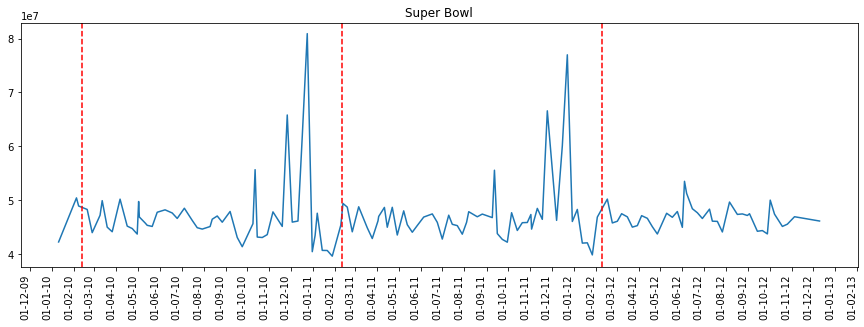

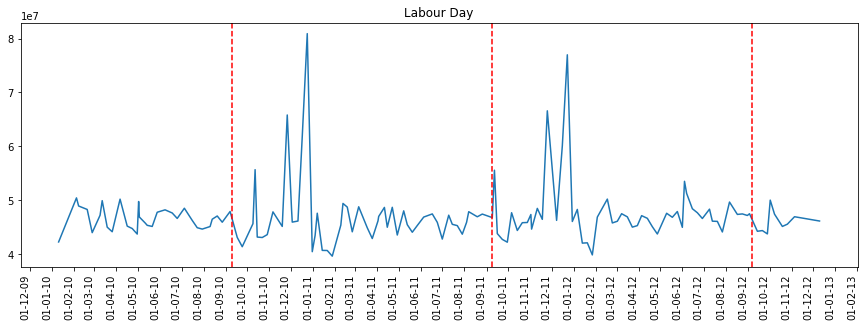

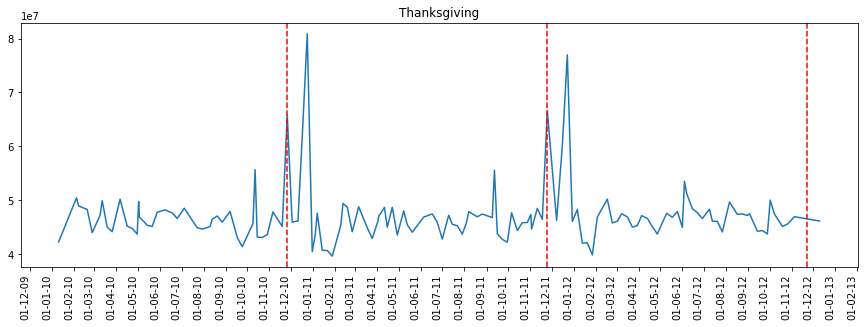

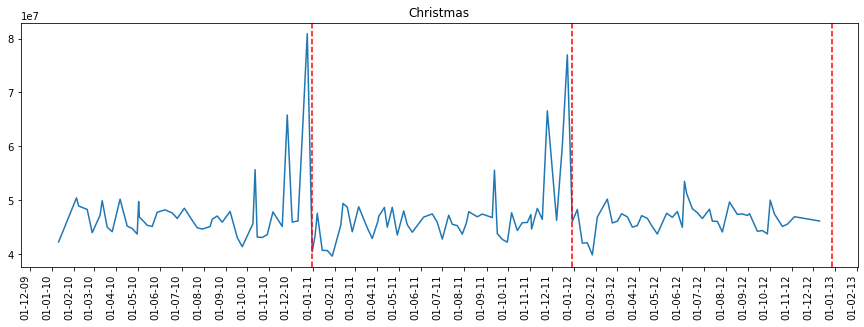

In [43]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

In [44]:
data.loc[data.Date.isin(Super_Bowl)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2,11,2011
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,2,10,2012
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,2,12,2010
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,2,11,2011
...,...,...,...,...,...,...,...,...,...,...,...
6202,44,2011-11-02,307486.73,1,30.83,3.034,127.859129,7.224,2,11,2011
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,2,10,2012
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,2,12,2010
6345,45,2011-11-02,766456.00,1,30.30,3.239,183.701613,8.549,2,11,2011


<AxesSubplot:title={'center':'Yearly Sales in Christmas holiday'}, xlabel='Year'>

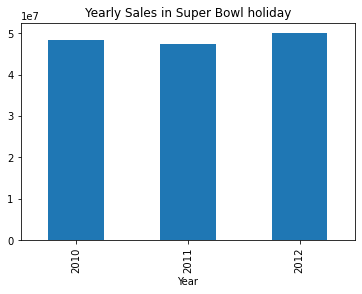

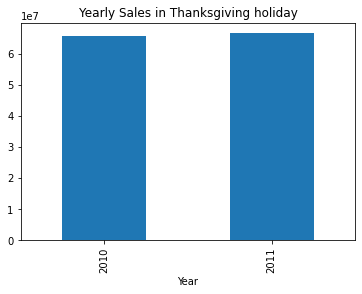

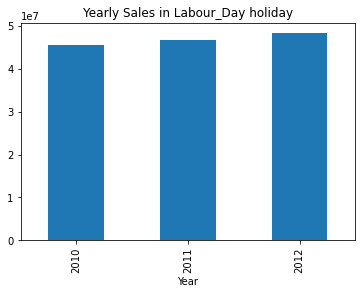

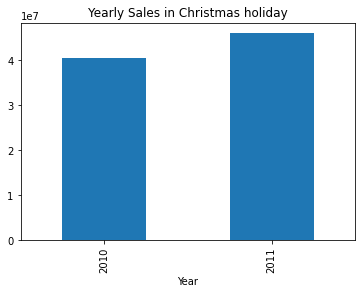

In [45]:
# Yearly Sales in holidays
Super_Bowl_df = pd.DataFrame(data.loc[data.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(data.loc[data.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(data.loc[data.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(data.loc[data.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales in Super Bowl holiday') 
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales in Thanksgiving holiday') 
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales in Labour_Day holiday')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales in Christmas holiday')

In [ ]:
### Q5: Provide a monthly and semester view of sales in units and give insights

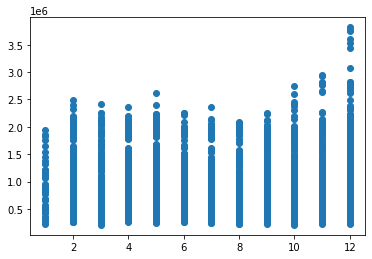

In [46]:
plt.scatter(data[data.Year==2010]['Month'],data[data.Year==2010]['Weekly_Sales'])
plt.show()

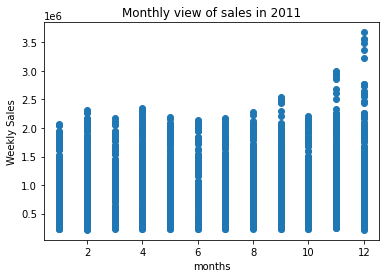

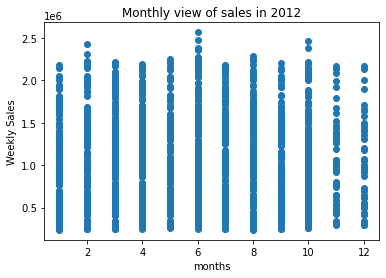

In [47]:
plt.scatter(data[data.Year==2011]["Month"],data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(data[data.Year==2012]["Month"],data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

Text(0.5, 1.0, 'Monthly view of sales')

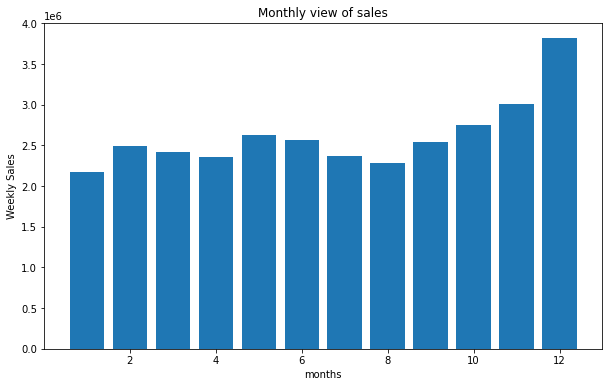

In [48]:
# Monthly view of sales for all years
plt.figure(figsize=(10,6))
plt.bar(data["Month"],data["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [50]:
plt.bar(data.groupby('Year')['Weekly_Sales'].sum())

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
t = data['Year'].unique()

In [ ]:
t = np.array(t)

In [ ]:
t

<Figure size 720x432 with 0 Axes>

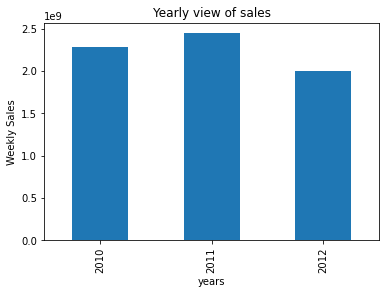

In [53]:
# Yearly view of sales
plt.figure(figsize=(10,6))
data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

In [ ]:
# BUILD PREDICITON 

C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

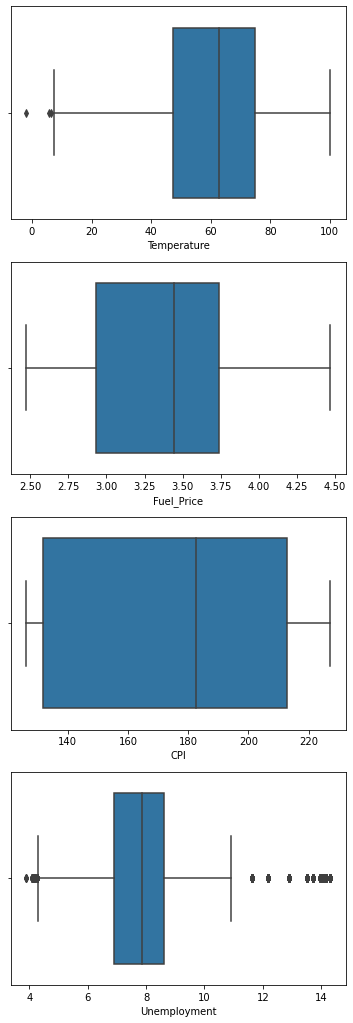

In [54]:
fig,axs = plt.subplots(4,figsize=(6,18))
X=data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i ,column in enumerate(X):
    sns.boxplot(data[column],ax =axs[i])

In [55]:

data_new = data[(data['Temperature']>10) &  (data['Unemployment']<10) & (data['Unemployment']>4.5)]

In [56]:
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

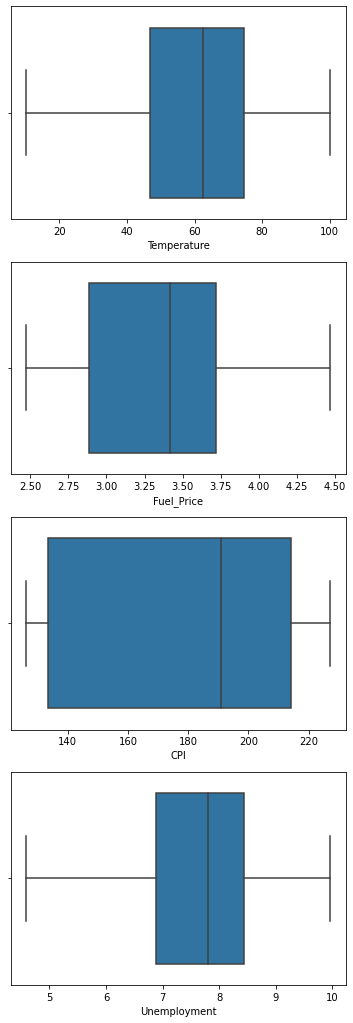

In [57]:
# check outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i])

In [58]:
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [59]:
rf = RandomForestRegressor()

In [60]:
# Select features and target 
X = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
reg =LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)


In [62]:
r2_score(y_test,y_pred)

0.14506348185435936

In [63]:
reg.score(X_train,y_train)

0.12470347219174616

C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


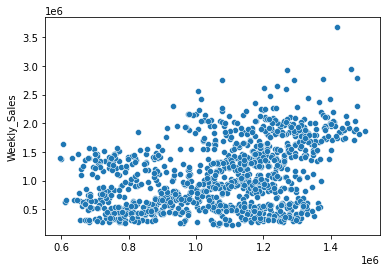

In [64]:
sns.scatterplot(y_pred, y_test);

In [65]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)


In [66]:
r2_score(y_test,y_pred)

0.9620278602576604

In [67]:
rf.score(X_train,y_train)

0.992292566015034

C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Weekly_Sales'>

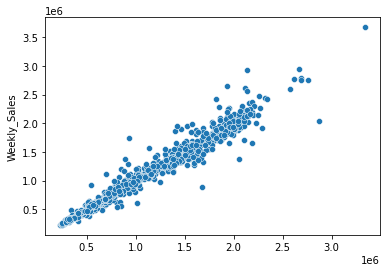

In [68]:
sns.scatterplot(y_pred,y_test
               )

In [69]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(rf,X,y,cv=10,scoring= 'accuracy'))

C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_sco

C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_sco

nan

In [70]:
## 
n_estimators= [2,60,100,120]
max_features= [0.2,0.4,0.8,1.0]
max_depth = [2,8,None]
max_samples=[0.5,0.75,1.0]
bootstrap =[True,False]

In [71]:
param_grid= {
    'n_estimators' : n_estimators,
    'max_features': max_features,
    'max_depth':max_depth,
    'max_samples':max_samples,
    'bootstrap' :bootstrap
}
print(param_grid)

{'n_estimators': [2, 60, 100, 120], 'max_features': [0.2, 0.4, 0.8, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False]}


In [72]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
rf_grid = GridSearchCV(estimator =rf,param_grid =param_grid,cv=5
                            ,verbose=2,n_jobs=-1)

In [73]:
 ## from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
##rf_grid = GridSearchCV(estimator =rf,param_distributions =param_grid,cv=5
                            ##,verbose=2,n_jobs=-1)

In [74]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.0716964  0.10347435 0.09055322 0.10215406 0.11666773 0.10289573
 0.10596053 0.09617426        nan        nan        nan        nan
 0.11233117 0.18097722 0.16287687 0.17025112 0.13858399 0.16178235
 0.17633525 0.17068819        nan        nan        nan        nan
 0.24464273 0.27213047 0.27732283 0.27167625 0.24090914 0.28166986
 0.27673967 0.27866447        nan        nan        nan        nan
 0.24189527 0.2523174  0.25271937 0.25058428 0.24012514 0.24497081
 0.24857889 0.24787482        nan        nan        nan        nan
 0.29670538 0.45015334 0.44700596 0.46354293 0.34705458 0.46135992
 0.45004984 0.4610388         nan        nan        nan        nan
 0.52489113 0.67338819 0.68112223 0.67975221 0.5127042  0.68244932
 0.67626234 0.68700785        nan        nan        nan        nan
 0.81721294 0.87672331 0.87791934 0.87838811 

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.4, 0.8, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [2, 60, 100, 120]},
             verbose=2)

In [78]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 0.8,
 'max_samples': 0.75,
 'n_estimators': 100}

In [79]:
rf_grid.best_score_


0.9454259543451784

In [77]:

    import lightgbm as ltb

ModuleNotFoundError: No module named 'lightgbm'

In [81]:
import lightgbm as ltb

ModuleNotFoundError: No module named 'lightgbm'

In [80]:
!pip install lightbgm

ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)
ERROR: No matching distribution found for lightbgm


In [ ]:
 -m pip install --upgrade pip

In [ ]:
pip install lightgbm

In [82]:
from sklearn.ensemble import ExtraTreesRegressor

In [83]:
et =ExtraTreesRegressor()

In [84]:
et.fit(X_train,y_train)

ExtraTreesRegressor()

In [85]:
y_pred = et.predict(X_test)

In [86]:
et.score(X_train,y_train)

1.0

C:\Users\VIKING RAGNAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Weekly_Sales'>

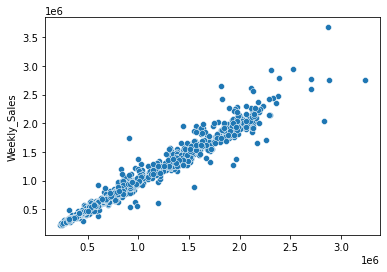

In [87]:
sns.scatterplot(y_pred,y_test)
